# Question 2: Question 2: Choosing k using elbowology

## Part A

In [2]:
import pandas as pd
import numpy as np
from hw2 import *
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [3]:
students = pd.read_csv("students_info.csv")
students.head(3)

,coffee,month,sleep,gym,color,gpa
0,0.7,apr,6.14,59.0,yellow,3.79
1,2.0,jun,6.98,111.0,green,2.34
2,1.5,sep,7.25,52.0,yellow,3.55


In [4]:
gym_coffee = students[["gym","coffee"]].to_numpy()
sleep_gpa = students[["sleep","gpa"]].to_numpy()
all_num = students[["coffee","sleep", "gym", "gpa"]].to_numpy()

In [5]:
gym_coffee_sse = looping_kmeans(gym_coffee, range(1, 11))
sleep_gpa_sse = looping_kmeans(sleep_gpa, range(1, 11))
all_num_sse = looping_kmeans(all_num, range(1, 11))

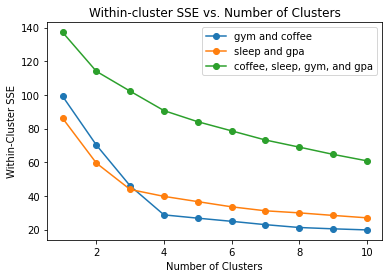

In [6]:
plt.plot(range(1, 11), gym_coffee_sse, marker='o', label='gym and coffee')
plt.plot(range(1, 11), sleep_gpa_sse, marker='o', label='sleep and gpa')
plt.plot(range(1, 11), all_num_sse, marker='o', label='coffee, sleep, gym, and gpa')

plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster SSE')
plt.legend()
plt.title('Within-cluster SSE vs. Number of Clusters')
plt.show()

1. gym and coffe: the value of k that is closest to the "elbow" is 4.
1. sleep and gpa: the value of k that is closest to the "elbow" is 3.
1. all numerical variabls: the value of k that is closest to the "elbow" is 2.

## Part B

I think our students fall into 4 clusters. For the combination of sleep and gpa (orange line) and all numerical variables (green line), the no-so-obvious "elbows" are at about _k=3_ and _k=2_ respectively. However, there is a clear elbow at _k=4_ in the combination of gym and coffee (blue line). Since more clusters are noticed in the combination of gym and coffee, it is very possible that there're some clusters not detected in other two combinations, so we should go with the greatest k. Therefore, I think there are at least 4 clusters in the sample (though Smithies cannot be categorized anyways).

# Question 3: Limitations of k-means

1. _Numerical_ variables: k-means works for numerical variables. For instance, in this homework, we use numerical variables gpa, sleep, coffee, and gym to categorize Smithies. Calculating distances and center points are clearly doable with numerical variables.
1. _Categorical_ variables: k-means does not work for categorical variables. A counter example is beverage preference. There are multiple options for beverage: coffee, tee, sparkling water, coke, and so on. We cannot assign values to different beverages.
1. _Ordinal_ variables: k-means works for ordinal variables. Variables like birth month have commonly agreed numerical values (1 for January and 2 for February), so they can be treated like numerical values.